# **1- Business Understanding**

## 📊 Dataset Column Descriptions – Fraud Detection

### ✅ Delinquency Counters (DPD = Days Past Due)
- **`dpd_5_cnt`**: Count of times the borrower was **5+ days overdue** on payments.
- **`dpd_15_cnt`**: Count of times the borrower was **15+ days overdue**.
- **`dpd_30_cnt`**: Count of times the borrower was **30+ days overdue**.

### 💼 Loan Information
- **`close_loans_cnt`**: Number of **closed (fully repaid or written off) loans**.
- **`past_billings_cnt`**: Number of **past billing cycles or statements**, possibly related to credit card use.

### 🌍 Region and Demographics
- **`federal_district_nm`**: Coded **federal district or region**.
- **`age`**: Age of the individual (possibly encoded).
- **`gender`**: Gender encoded numerically (e.g., 0 = male, 1 = female).

### 💳 Payment Type (One-Hot Encoded)
- **`payment_type_0`** to **`payment_type_5`**: One-hot encoded columns for **payment/product types** (e.g., card, loan, wallet, etc.).

### 📈 Credit Scores
- **`score_1`**: First credit score or internal risk score.
- **`score_2`**: Second credit score (less frequently available).

### 🏷️ Target Column
- **`bad_flag`**: Label indicating fraud or default:
  - `'bad'` = fraudulent/defaulted
  - `'good'` = non-fraudulent

### 🗓️ Loan Reporting Date
- **`rep_loan_date_year`**
- **`rep_loan_date_month`**
- **`rep_loan_date_day`**
- **`rep_loan_date_weekday`**

### 🏦 First Loan Date
- **`first_loan_year`**
- **`first_loan_month`**
- **`first_loan_day`**
- **`first_loan_weekday`**

### ⚠️ First Overdue Event Date
- **`first_overdue_date_year`**
- **`first_overdue_date_month`**
- **`first_overdue_date_day`**
- **`first_overdue_date_weekday`**


# **2- Import Libraries**

In [1]:
!pip install openml

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.1/95.1 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 16.8 MB/s eta 0:00:00
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11717 sha256=39d46abfda2f53b56869884cbbbd8b5e21ad0578691941d22acf300b048fad2b
  Stored in directory: /root/.cache/pip/wheels/00/23/31/5e562fce1f95aabe57f2a7320d07433ba1cd152bcde2f6a002
Successfully built liac-arff


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, f1_score
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

In [3]:
dataset = openml.datasets.get_dataset(46358)
df, *_ = dataset.get_data()  # This returns a pandas DataFrame

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **3- Understand the data**

In [5]:
df.head(10)

,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,close_loans_cnt,federal_district_nm,payment_type_0,payment_type_1,payment_type_2,payment_type_3,payment_type_4,...,rep_loan_date_day,rep_loan_date_weekday,first_loan_year,first_loan_month,first_loan_day,first_loan_weekday,first_overdue_date_year,first_overdue_date_month,first_overdue_date_day,first_overdue_date_weekday
0,1.0,0.0,0.0,0.0,6,0,0,6,0,0,...,26,2,2015,9,28,1,2016.0,1.0,30.0,2
1,NaN,NaN,NaN,2.0,1,0,0,0,5,0,...,30,3,2015,12,21,1,NaN,NaN,NaN,-1
2,NaN,NaN,NaN,1.0,6,0,0,4,0,0,...,29,6,2015,6,30,5,NaN,NaN,NaN,-1
3,NaN,NaN,NaN,0.0,5,0,3,0,0,0,...,1,5,2015,8,3,1,NaN,NaN,NaN,-1
4,NaN,NaN,NaN,2.0,3,0,0,6,0,0,...,1,2,2015,8,30,3,NaN,NaN,NaN,-1
5,1.0,0.0,0.0,2.0,3,0,0,9,0,0,...,18,4,2015,6,7,3,2015.0,11.0,6.0,0
6,1.0,1.0,0.0,0.0,3,0,0,5,0,0,...,23,1,2015,6,4,4,2015.0,11.0,6.0,0
7,3.0,1.0,0.0,1.0,2,0,0,4,0,0,...,19,1,2015,12,3,4,2016.0,1.0,15.0,0
8,1.0,1.0,0.0,0.0,3,0,0,5,0,0,...,22,3,2015,6,4,4,2015.0,11.0,6.0,0
9,NaN,NaN,NaN,1.0,3,0,0,3,0,0,...,27,0,2015,10,27,5,NaN,NaN,NaN,-1


In [6]:
df.info()
# i want to get info about and also the memory usage side

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4156 entries, 0 to 4155
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   dpd_5_cnt                   675 non-null    float64
 1   dpd_15_cnt                  675 non-null    float64
 2   dpd_30_cnt                  675 non-null    float64
 3   close_loans_cnt             4141 non-null   float64
 4   federal_district_nm         4156 non-null   int64  
 5   payment_type_0              4156 non-null   uint8  
 6   payment_type_1              4156 non-null   uint8  
 7   payment_type_2              4156 non-null   uint8  
 8   payment_type_3              4156 non-null   uint8  
 9   payment_type_4              4156 non-null   uint8  
 10  payment_type_5              4156 non-null   uint8  
 11  past_billings_cnt           3908 non-null   float64
 12  score_1                     3507 non-null   float64
 13  score_2                     239 n

In [ ]:
df.columns
#get column names

Index(['dpd_5_cnt', 'dpd_15_cnt', 'dpd_30_cnt', 'close_loans_cnt',
       'federal_district_nm', 'payment_type_0', 'payment_type_1',
       'payment_type_2', 'payment_type_3', 'payment_type_4', 'payment_type_5',
       'past_billings_cnt', 'score_1', 'score_2', 'age', 'gender', 'bad_flag',
       'rep_loan_date_year', 'rep_loan_date_month', 'rep_loan_date_day',
       'rep_loan_date_weekday', 'first_loan_year', 'first_loan_month',
       'first_loan_day', 'first_loan_weekday', 'first_overdue_date_year',
       'first_overdue_date_month', 'first_overdue_date_day',
       'first_overdue_date_weekday'],
      dtype='object')

# **3- Feauter Engineering**

In [8]:
dpd_columns = ['dpd_5_cnt', 'dpd_15_cnt', 'dpd_30_cnt',
               'first_overdue_date_year', 'first_overdue_date_month',
               'first_overdue_date_day']
df[dpd_columns] = df[dpd_columns].fillna(0)
#replace nan values with 0

In [11]:
df['has_delinquency'] = (df[dpd_columns] > 0).any(axis=1).astype(int)
#Handling has_delinquency columns

count     248.000000
mean     2015.665323
std         0.472832
min      2015.000000
25%      2015.000000
50%      2016.000000
75%      2016.000000
max      2016.000000
Name: first_loan_year, dtype: float64


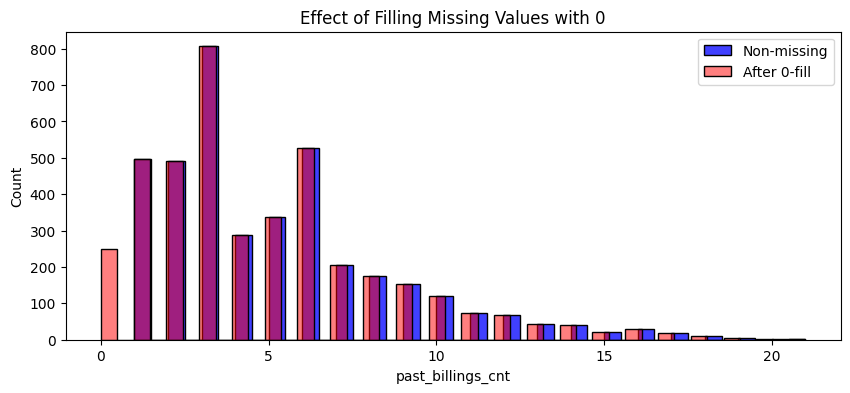

In [12]:
# Check if missing 'past_billings_cnt' rows are new customers
missing_bills = df[df['past_billings_cnt'].isnull()]
print(missing_bills['first_loan_year'].describe())  # Are they recent?

# Compare distributions
plt.figure(figsize=(10, 4))
sns.histplot(df['past_billings_cnt'].dropna(), color='blue', label='Non-missing')
sns.histplot(df['past_billings_cnt'].fillna(0), color='red', label='After 0-fill', alpha=0.5)
plt.legend()
plt.title('Effect of Filling Missing Values with 0')
plt.show()

In [13]:
#because  missing = data gaps (not true zeros) not new customer as understood in the previous ploting
# Calculate median (ignoring NaN)
median_billings = df['past_billings_cnt'].median()

# Fill missing values
df['past_billings_cnt'] = df['past_billings_cnt'].fillna(median_billings)

In [14]:
#15 missing value
df['close_loans_cnt'] = df['close_loans_cnt'].fillna(df['close_loans_cnt'].median())


In [15]:
#to check if this column is important or not
df.corr()['score_2'].dropna()

,score_2
dpd_5_cnt,-0.052612
dpd_15_cnt,-0.087089
dpd_30_cnt,-0.038565
close_loans_cnt,0.145570
federal_district_nm,0.001112
payment_type_0,0.081139
payment_type_1,0.050881
payment_type_2,0.019607
payment_type_3,0.017808
payment_type_4,0.037947


In [16]:
#replace nan with -1
df['score_2'] = df['score_2'].fillna(-1)


In [17]:
df['score_1'] = df['score_1'].fillna(df['score_1'].median())


In [18]:
df.head()
#realize:nan valus converted to zeros
#relaize:new column created has_delinquency

,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,close_loans_cnt,federal_district_nm,payment_type_0,payment_type_1,payment_type_2,payment_type_3,payment_type_4,...,rep_loan_date_weekday,first_loan_year,first_loan_month,first_loan_day,first_loan_weekday,first_overdue_date_year,first_overdue_date_month,first_overdue_date_day,first_overdue_date_weekday,has_delinquency
0,1.0,0.0,0.0,0.0,6,0,0,6,0,0,...,2,2015,9,28,1,2016.0,1.0,30.0,2,1
1,0.0,0.0,0.0,2.0,1,0,0,0,5,0,...,3,2015,12,21,1,0.0,0.0,0.0,-1,0
2,0.0,0.0,0.0,1.0,6,0,0,4,0,0,...,6,2015,6,30,5,0.0,0.0,0.0,-1,0
3,0.0,0.0,0.0,0.0,5,0,3,0,0,0,...,5,2015,8,3,1,0.0,0.0,0.0,-1,0
4,0.0,0.0,0.0,2.0,3,0,0,6,0,0,...,2,2015,8,30,3,0.0,0.0,0.0,-1,0


In [19]:
#check for missing data
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)


Series([], dtype: int64)


In [20]:
# Check unique values and distribution
print(df['bad_flag'].value_counts())
print(df['bad_flag'].value_counts(normalize=True))  # For percentage
#imbalanced data realised

bad_flag
0    3739
1     417
Name: count, dtype: int64
bad_flag
0    0.899663
1    0.100337
Name: proportion, dtype: float64


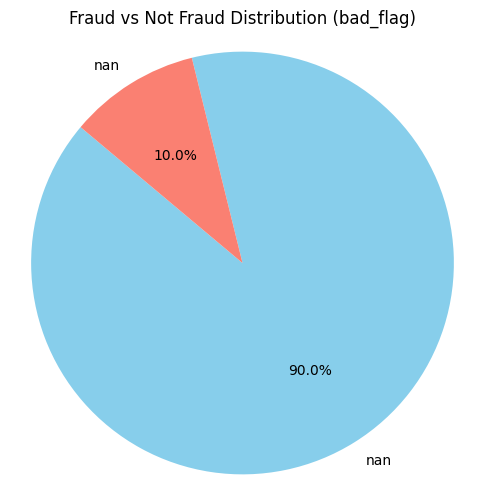

In [27]:
import matplotlib.pyplot as plt

# Value counts for 'bad_flag'
target_counts = df['bad_flag'].value_counts().sort_index()
label_map = {0: 'Not Fraud', 1: 'Fraud'}
labels = target_counts.index.map(label_map)

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(target_counts,
        labels=labels,
        autopct='%1.1f%%',
        startangle=140,
        colors=['skyblue', 'salmon'])

plt.title('Fraud vs Not Fraud Distribution (bad_flag)')
plt.axis('equal')  # Make the pie chart a circle
plt.show()


**Note: The data is imbalanced so we use SMOT technique to make it balanced**

In [28]:

X = df.drop('bad_flag', axis=1)
y = df['bad_flag'].astype(int)  # convert to numeric if it's object

#  (Optional) If needed, split before SMOTE to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

#  Apply SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

#  Check results
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_bal.value_counts())


Before SMOTE: bad_flag
0    2990
1     334
Name: count, dtype: int64
After SMOTE: bad_flag
0    2990
1    2990
Name: count, dtype: int64


# **4- ML Training and Evaluation**

In [32]:
#Train both models
log_reg = LogisticRegression(max_iter=1000, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

log_reg.fit(X_train_bal, y_train_bal)
rf.fit(X_train_bal, y_train_bal)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier(random_state=42)

In [33]:
# Evaluate both models
y_pred_log = log_reg.predict(X_test)
y_pred_rf = rf.predict(X_test)

print("🔍 Logistic Regression Report:")
print(classification_report(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]))

print("\n🌲 Random Forest Report:")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))


🔍 Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.94      0.78      0.85       749
           1       0.22      0.57      0.32        83

    accuracy                           0.76       832
   macro avg       0.58      0.67      0.59       832
weighted avg       0.87      0.76      0.80       832

ROC-AUC: 0.7507841781009217

🌲 Random Forest Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       749
           1       0.43      0.27      0.33        83

    accuracy                           0.89       832
   macro avg       0.68      0.61      0.63       832
weighted avg       0.87      0.89      0.88       832

ROC-AUC: 0.7678993678318078


In [36]:
# Calculate accuracy for both models
acc_log = accuracy_score(y_test, y_pred_log)
acc_rf = accuracy_score(y_test, y_pred_rf)

# Pick the best model based on accuracy
best_model = "Random Forest" if acc_rf > acc_log else "Logistic Regression"

print(f"🔢 Logistic Regression Accuracy: {acc_log:.4f}")
print(f"🌲 Random Forest Accuracy: {acc_rf:.4f}")
print(f"\n✅ Best Model Based on Accuracy: {best_model}")

🔢 Logistic Regression Accuracy: 0.7584
🌲 Random Forest Accuracy: 0.8918

✅ Best Model Based on Accuracy: Random Forest


# **5- Model Inference**

In [37]:
import joblib

# Save the best model
if best_model == "Random Forest":
    joblib.dump(rf, "best_model.pkl")
else:
    joblib.dump(log_reg, "best_model.pkl")

In [38]:
# Load model
model = joblib.load("best_model.pkl")

In [39]:
new_data = pd.DataFrame([{
    'dpd_5_cnt': 0.0,
    'dpd_15_cnt': 0.0,
    'dpd_30_cnt': 0.0,
    'close_loans_cnt': 2.0,
    'federal_district_nm': 3,
    'payment_type_0': 1,
    'payment_type_1': 0,
    'payment_type_2': 0,
    'payment_type_3': 0,
    'payment_type_4': 0,
    'payment_type_5': 0,
    'past_billings_cnt': 5.0,
    'score_1': 650.0,
    'score_2': 670.0,
    'age': 35,
    'gender': 1,
    'rep_loan_date_year': 2024,
    'rep_loan_date_month': 6,
    'rep_loan_date_day': 15,
    'rep_loan_date_weekday': 5,
    'first_loan_year': 2018,
    'first_loan_month': 4,
    'first_loan_day': 20,
    'first_loan_weekday': 4,
    'first_overdue_date_year': 2024.0,
    'first_overdue_date_month': 7.0,
    'first_overdue_date_day': 10.0,
    'first_overdue_date_weekday': 2,
    'has_delinquency': 0
}])


In [40]:
prediction = model.predict(new_data)
print("Prediction:", "Fraud" if prediction[0] == 1 else "Not Fraud")


Prediction: Not Fraud
